In [1]:
import numpy as np
import pickle
from scipy.stats import pearsonr
from scipy.stats import skew
import sys
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils_spatial as utils_spatial

In [2]:
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8.pickle','rb'))
ddf = outliers.load_metadata(Yaudio, metadata_file='../data/metadata.csv')
w, data_countries = utils_spatial.get_neighbors_for_countries_in_dataset(Y)
w_dict = utils_spatial.from_weights_to_dict(w, data_countries)
Xrhy, Xmel, Xmfc, Xchr = X_list
X = np.concatenate((Xrhy, Xmel, Xmfc, Xchr), axis=1)

# global outliers
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)

/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 21 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago


In [3]:
X.shape

(8200, 380)

In [4]:
D = pairwise_distances(X, metric='mahalanobis')

In [5]:
D.shape

(8200, 8200)

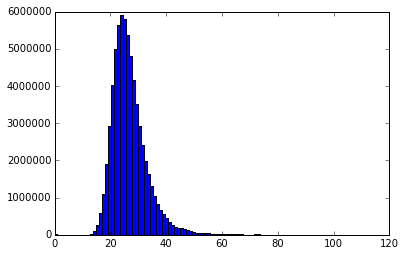

In [6]:
plt.hist(D.ravel(), bins=100);

In [7]:
def n_occurrence_from_D(D, k=10, n_items=None):
    if n_items is None:
        n_items = len(D)
    sort_idx = np.argsort(D, axis=1)
    D_k = sort_idx[:, 1:(k+1)]  # nearest neighbour is the item itself
    N_k = np.bincount(D_k.astype(int).ravel(), minlength=n_items)
    return N_k

8.18316065981


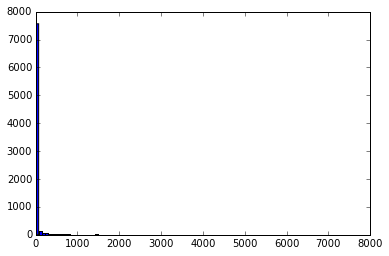

In [8]:
N_k = n_occurrence_from_D(D, k=100)
print skew(N_k)
plt.hist(N_k, bins=100);

In [11]:
#sort_idx = np.argsort(D, axis=1)
k = 10
D_k = sort_idx[:, 1:(k+1)]

In [12]:
D_k

array([[4650, 2942, 3520, ..., 1318, 6678, 6056],
       [1933, 6143, 6757, ..., 7269, 4321, 1563],
       [3170, 2549, 4860, ..., 6678, 7414, 6056],
       ..., 
       [6016, 2243, 1616, ..., 7627, 2018,  515],
       [7027, 4860, 6346, ...,  997, 3892, 1846],
       [5119, 1563, 4035, ..., 3486, 7617, 3854]])